### Regole di stile

In [1]:
%%html
<style type="text/css">
h1 {
    color:#000;
    font: 0 sans-serif;
    border-top: 5px solid #CFB4A6;
    padding-top: 10px;
    
}
table {
    float:left
}
</style>

# Dynamic Community Discover

In [8]:
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
import warnings
import json
import numpy as np
import powerlaw
import cdlib
from cdlib import algorithms, evaluation, TemporalClustering, viz
import dynetx as dn
import random
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from collections import OrderedDict
%run Utilyties.ipynb
%run Communities_lib.ipynb

## Snapshots temporali e visualizzaione delle evoluzioni con un singolo algoritmo

`Ranges` è una lista con al suo interno delle liste contenti le date di quel range.
Serve per creare gli snapshots della rete sulla base dei frammenti temporali scelti.

In [20]:

ranges = [
    ['2021-06-10', '2021-06-11', '2021-06-12', '2021-06-13', '2021-06-14'], # Italia - Turchia (1)
    ['2021-06-15', '2021-06-16', '2021-06-17', '2021-06-18', '2021-06-19'], # Italia - Svizzera (2)
    ['2021-06-20', '2021-06-21', '2021-06-22', '2021-06-23', '2021-06-24'], # Italia - Galles (3)
    ['2021-06-25', '2021-06-26', '2021-06-27', '2021-06-28', '2021-06-29'], # Italia - Austria (4)
    ['2021-06-30', '2021-07-01', '2021-07-02', '2021-07-03', '2021-07-04'], # Italia - Belgio (5)
    ['2021-07-05', '2021-07-06', '2021-07-07', '2021-07-08', '2021-07-09'], # Italia - Spagna (6)
    ['2021-07-10', '2021-07-11', '2021-07-12'],                             # Italia - Inghilterra (7)
]

snapshots = get_snapshot("../data/final/data_complete.json", ranges)

In [19]:
algorithm = "angel"
G, matches, coms, coms_nodes, net_growth, time, tc = dynamic_network_communities(snapshots, ranges, algorithm)

--->	angel	<---
--- Network dal: 2021-06-10 al 2021-06-11 (Tempo 1)--- 

--- Network dal: 2021-06-12 al 2021-06-12 (Tempo 2)--- 

--- Network dal: 2021-06-13 al 2021-06-13 (Tempo 3)--- 

--- Network dal: 2021-06-14 al 2021-06-14 (Tempo 4)--- 

--- Network dal: 2021-06-15 al 2021-06-19 (Tempo 5)--- 

--- Network dal: 2021-06-20 al 2021-06-24 (Tempo 6)--- 

--- Network dal: 2021-06-25 al 2021-06-29 (Tempo 7)--- 



KeyboardInterrupt: 

In [5]:
community_evolution("1_0")

{'1_0/simple': [('1_0', '2_0', 1.0)],
 '2_0/simple': [('2_0', '3_0', 0.008680555555555556)],
 '3_0/split': [('3_0', '4_23', 0.0008650519031141869),
  ('3_0', '4_5', 0.0008620689655172414),
  ('3_0', '4_0', 0.16336985911484275),
  ('3_0', '4_1', 0.0008583690987124463)],
 '4_0/split': [('4_0', '5_0', 0.9299084030266827),
  ('4_0', '5_40', 0.00014232849416453175),
  ('4_0', '5_22', 0.0005694760820045558),
  ('4_0', '5_19', 0.0001422879908935686),
  ('4_0', '5_25', 0.00014230823964707557)],
 '4_1/simple': [('4_1', '5_2', 1.0)],
 '4_23/simple': [('4_23', '5_5', 0.07692307692307693)],
 '4_5/simple': [('4_5', '5_4', 1.0)],
 '5_0/split': [('5_0', '6_0', 0.9876071193144363),
  ('5_0', '6_4', 0.0011976047904191617)],
 '5_19/simple': [('5_19', '6_19', 1.0)],
 '5_2/simple': [('5_2', '6_1', 1.0)],
 '5_22/simple': [('5_22', '6_23', 1.0)],
 '5_25/simple': [('5_25', '6_26', 1.0)],
 '5_4/simple': [('5_4', '6_3', 1.0)],
 '5_40/simple': [('5_40', '6_40', 1.0)],
 '5_5/simple': [('5_5', '6_5', 1.0)],
 '6_0

************** [ TEMPO 1  ---> TEMPO  2  ] **************
La comunità 1_0 DIVENTA la comunità 2_0


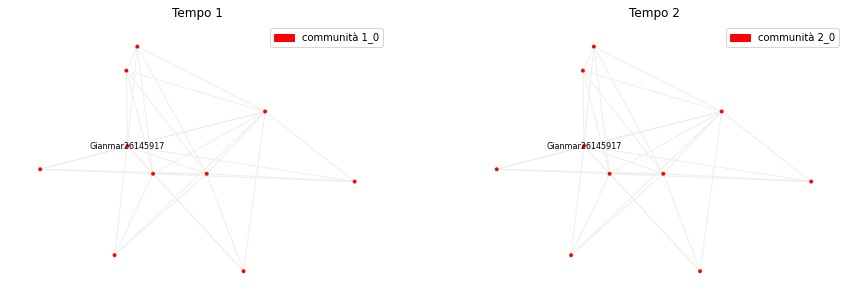

************** [ TEMPO 2  ---> TEMPO  3  ] **************
La comunità 2_0 CRESCE di 1142 e diventa la comunità 3_0


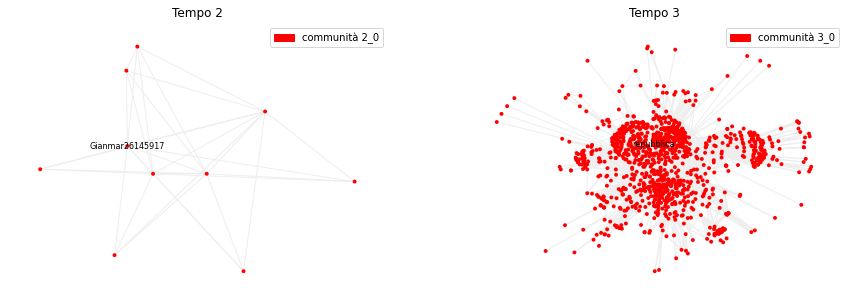

************** [ TEMPO 3  ---> TEMPO  4  ] **************
Comunita 3_0 al tempo 4 si splitta in 4 comunità.


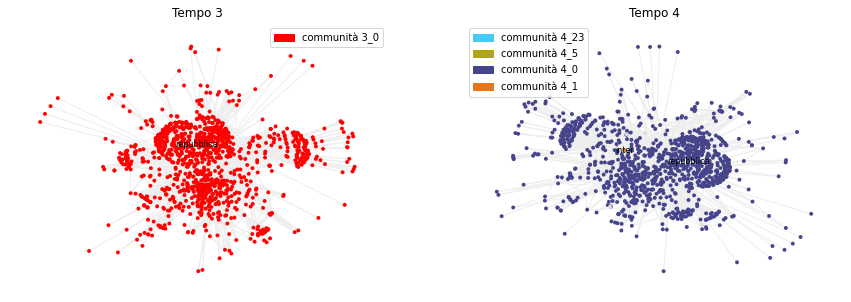

************** [ TEMPO 4  ---> TEMPO  5  ] **************
Comunita 4_0 al tempo 5 si splitta in 5 comunità.


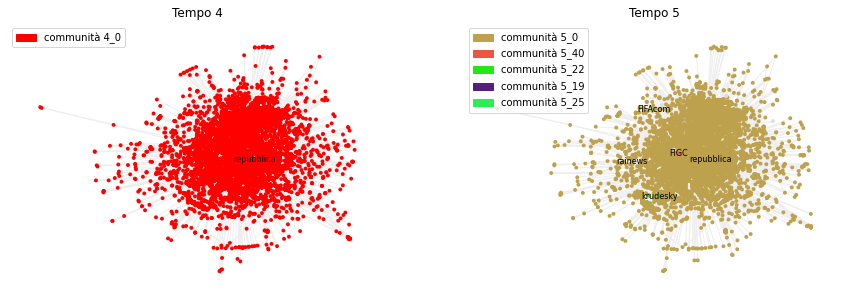

La comunità 4_1 DIVENTA la comunità 5_2


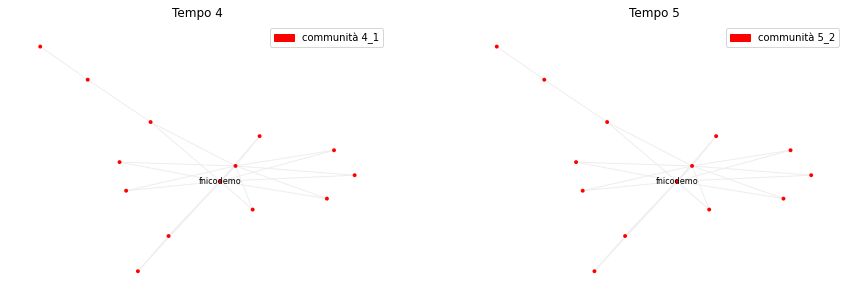

La comunità 4_23 CRESCE di 4 e diventa la comunità 5_5


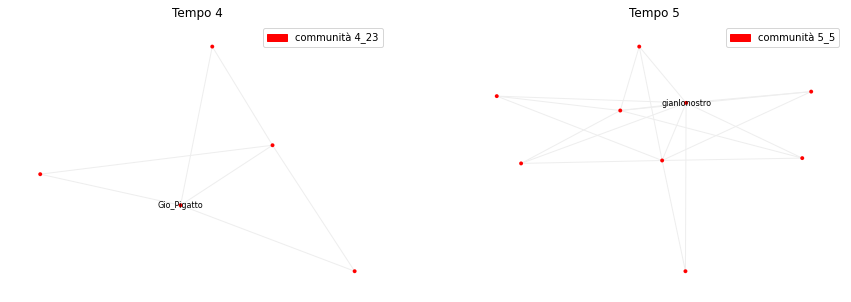

La comunità 4_5 DIVENTA la comunità 5_4


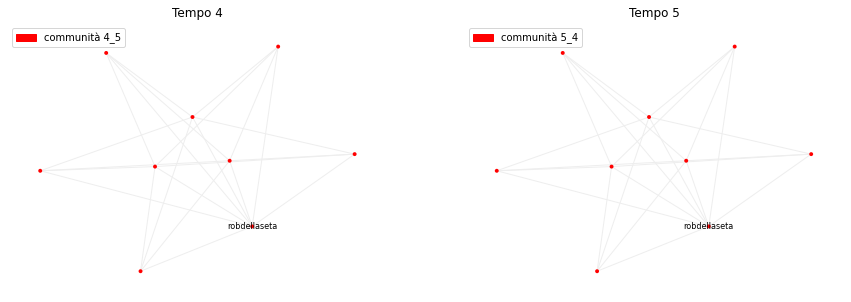

************** [ TEMPO 5  ---> TEMPO  6  ] **************
Comunita 5_0 al tempo 6 si splitta in 2 comunità.


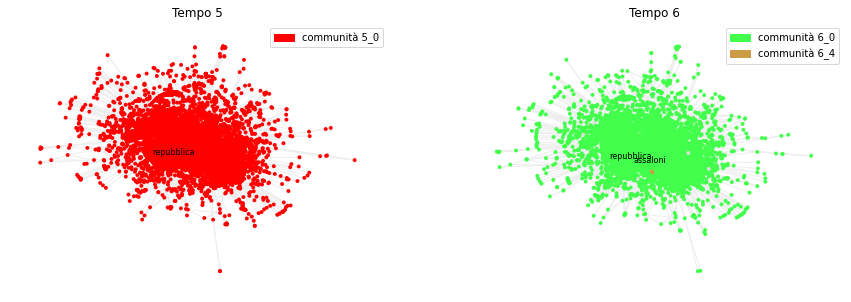

La comunità 5_19 DIVENTA la comunità 6_19


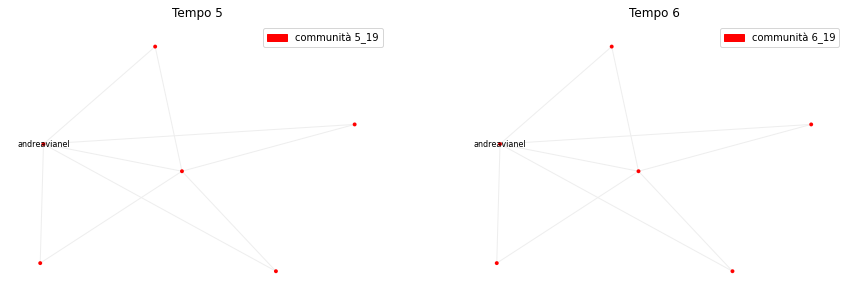

La comunità 5_2 DIVENTA la comunità 6_1


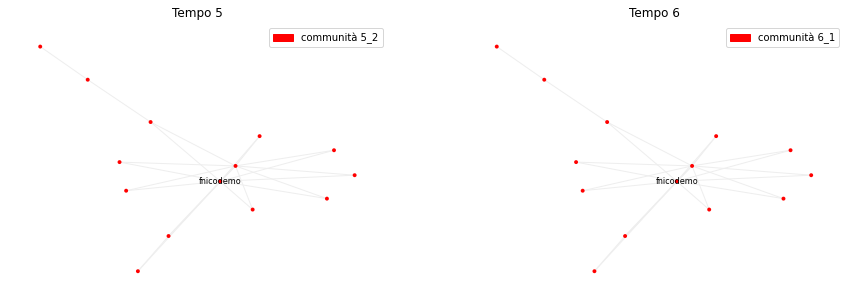

La comunità 5_22 DIVENTA la comunità 6_23


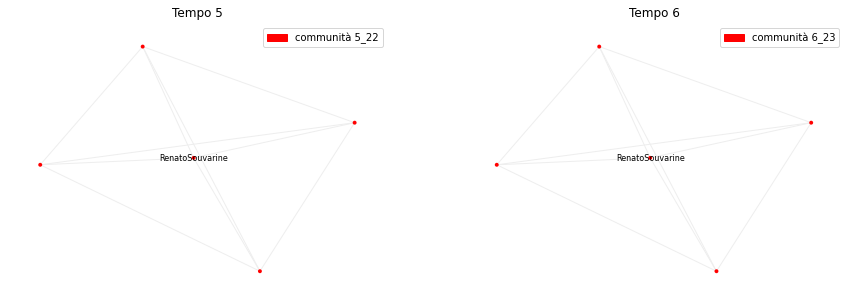

La comunità 5_25 DIVENTA la comunità 6_26


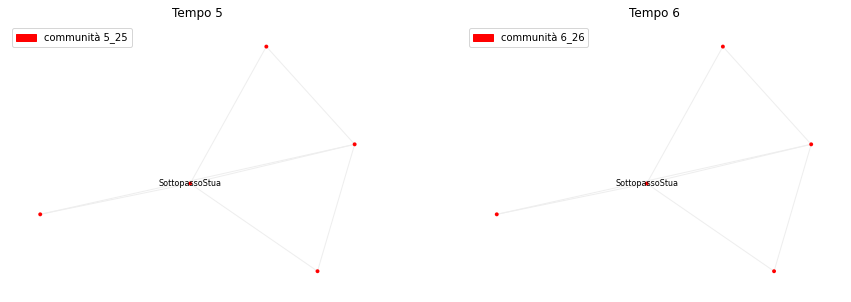

La comunità 5_4 DIVENTA la comunità 6_3


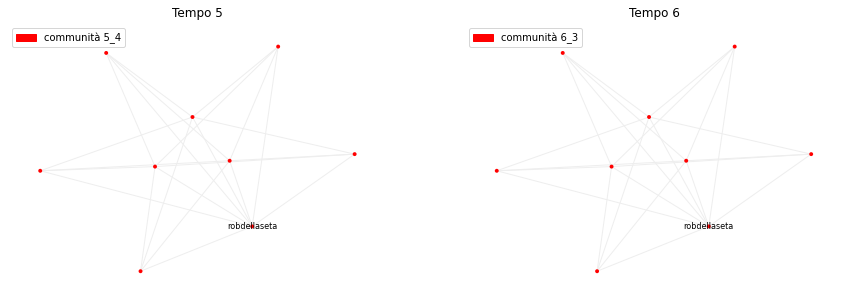

La comunità 5_40 DIVENTA la comunità 6_40


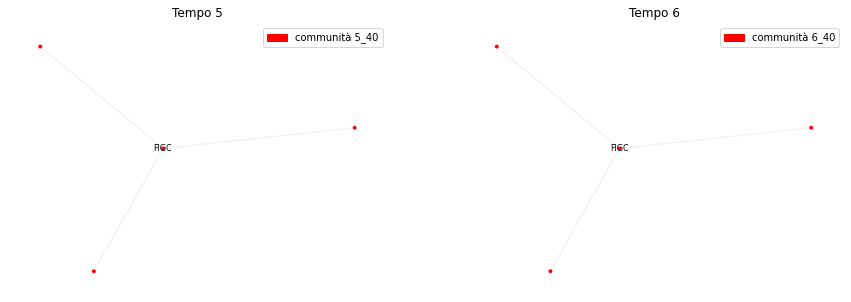

La comunità 5_5 DIVENTA la comunità 6_5


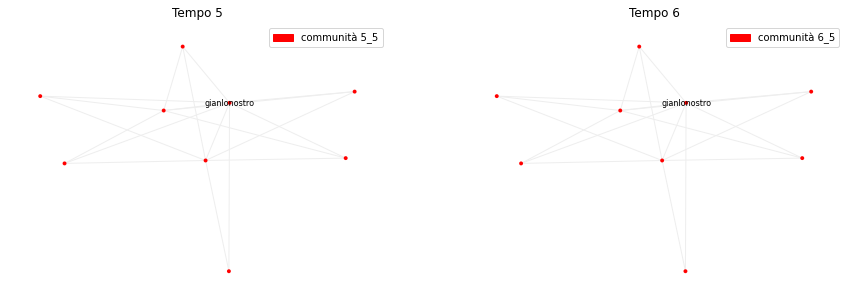

************** [ TEMPO 6  ---> TEMPO  7  ] **************
Comunita 6_0 al tempo 7 si splitta in 4 comunità.


KeyboardInterrupt: 

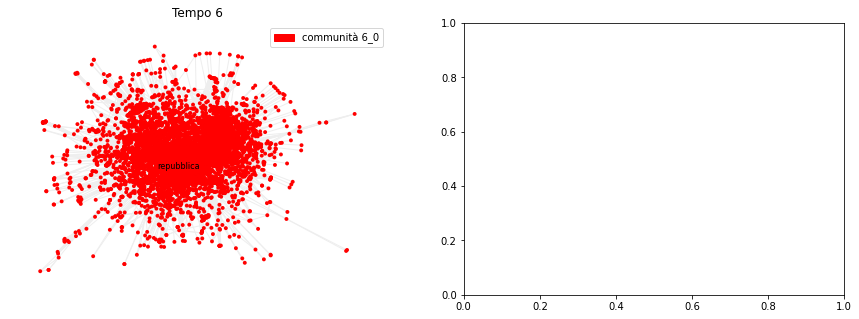

In [6]:
viz_communities_evolution("1_0")

In [ ]:
xAxes=["1/2","2/3","3/4","4/5","5/6","6/7"]
title = "Growth, Shrink, Merge e Split delle comunità nel tempo"
viz_events_graph(matches, len(ranges), title, xAxes, algorithm)

## Studio di tutti algoritmi

### > Set Up dei vari algoritmi

In [8]:
LO_G, LO_matches, LO_coms, LO_coms_nodes, net_growth, time, LO_tc = dynamic_network_communities(snapshots, ranges, "louvain")
LP_G, LP_matches, LP_coms, LP_coms_nodes, net_growth, time, LP_tc = dynamic_network_communities(snapshots, ranges, "label-propagation")
AN_G, AN_matches, AN_coms, AN_coms_nodes, net_growth, time, AN_tc = dynamic_network_communities(snapshots, ranges, "angel")
DE_G, DE_matches, DE_coms, DE_coms_nodes, net_growth, time, DE_tc = dynamic_network_communities(snapshots, ranges, "demon")
WP_G, WP_matches, WP_coms, WP_coms_nodes, net_growth, time, WP_tc = dynamic_network_communities(snapshots, ranges, "walk-trap")
IM_G, IM_matches, IM_coms, IM_coms_nodes, net_growth, time, IM_tc = dynamic_network_communities(snapshots, ranges, "infomap")

--->	louvain	<---
--- Network dal: 2021-06-10 al 2021-06-14 (Tempo 1)--- 

--- Network dal: 2021-06-15 al 2021-06-19 (Tempo 2)--- 

--- Network dal: 2021-06-20 al 2021-06-24 (Tempo 3)--- 

--- Network dal: 2021-06-25 al 2021-06-29 (Tempo 4)--- 

--- Network dal: 2021-06-30 al 2021-07-04 (Tempo 5)--- 

--- Network dal: 2021-07-05 al 2021-07-09 (Tempo 6)--- 

--- Network dal: 2021-07-10 al 2021-07-12 (Tempo 7)--- 

--->	label-propagation	<---
--- Network dal: 2021-06-10 al 2021-06-14 (Tempo 1)--- 

--- Network dal: 2021-06-15 al 2021-06-19 (Tempo 2)--- 

--- Network dal: 2021-06-20 al 2021-06-24 (Tempo 3)--- 

--- Network dal: 2021-06-25 al 2021-06-29 (Tempo 4)--- 

--- Network dal: 2021-06-30 al 2021-07-04 (Tempo 5)--- 

--- Network dal: 2021-07-05 al 2021-07-09 (Tempo 6)--- 

--- Network dal: 2021-07-10 al 2021-07-12 (Tempo 7)--- 

--->	angel	<---
--- Network dal: 2021-06-10 al 2021-06-14 (Tempo 1)--- 

--- Network dal: 2021-06-15 al 2021-06-19 (Tempo 2)--- 

--- Network dal: 2021-06-2

### > Set Up del numero delle comunità durante gli snapshots

In [9]:
LO_time_coms =  get_time_coms(LO_matches, LO_tc, (len(ranges)))
LP_time_coms =  get_time_coms(LP_matches, LP_tc, (len(ranges)))
AN_time_coms =  get_time_coms(AN_matches, AN_tc, (len(ranges)))
DE_time_coms =  get_time_coms(DE_matches, DE_tc, (len(ranges)))
WP_time_coms =  get_time_coms(WP_matches, WP_tc, (len(ranges)))
IM_time_coms =  get_time_coms(IM_matches, IM_tc, (len(ranges)))

### > Numero iniziale, Numero massimo e Numero finale delle comunità durente gli snapshots

In [10]:
communities_start_max_end(LO_time_coms, 'Louvain')
communities_start_max_end(LP_time_coms, 'Label Propagation')
communities_start_max_end(AN_time_coms, 'Angel')
communities_start_max_end(DE_time_coms, 'Demon')
communities_start_max_end(WP_time_coms, 'Walk Trap')
communities_start_max_end(IM_time_coms, 'Infomap')

Louvain
 Numero di comunità iniziali:	16 
 Numero massimo di comunità:	261 
 Numero di comunità finali:	261

Label Propagation
 Numero di comunità iniziali:	16 
 Numero massimo di comunità:	851 
 Numero di comunità finali:	814

Angel
 Numero di comunità iniziali:	6 
 Numero massimo di comunità:	47 
 Numero di comunità finali:	47

Demon
 Numero di comunità iniziali:	15 
 Numero massimo di comunità:	374 
 Numero di comunità finali:	374

Walk Trap
 Numero di comunità iniziali:	16 
 Numero massimo di comunità:	898 
 Numero di comunità finali:	898

Infomap
 Numero di comunità iniziali:	16 
 Numero massimo di comunità:	245 
 Numero di comunità finali:	245



### > Comparazione delle comunità con NF1 - heatmap

<cdlib.classes.node_clustering.NodeClustering object at 0x7f85fec52f10> <cdlib.classes.node_clustering.NodeClustering object at 0x7f85fec52f10> --> 1.0
<cdlib.classes.node_clustering.NodeClustering object at 0x7f85fec52f10> <cdlib.classes.node_clustering.NodeClustering object at 0x7f85fec09be0> --> 0.29
<cdlib.classes.node_clustering.NodeClustering object at 0x7f85fec52f10> <cdlib.classes.node_clustering.NodeClustering object at 0x7f85fec0e9d0> --> 0.01
<cdlib.classes.node_clustering.NodeClustering object at 0x7f85fec52f10> <cdlib.classes.node_clustering.NodeClustering object at 0x7f85fec316d0> --> 0.26
<cdlib.classes.node_clustering.NodeClustering object at 0x7f85fec52f10> <cdlib.classes.node_clustering.NodeClustering object at 0x7f85fec7bfa0> --> 0.77
<cdlib.classes.node_clustering.NodeClustering object at 0x7f85fec09be0> <cdlib.classes.node_clustering.NodeClustering object at 0x7f85fec52f10> --> 0.1
<cdlib.classes.node_clustering.NodeClustering object at 0x7f85fec09be0> <cdlib.class

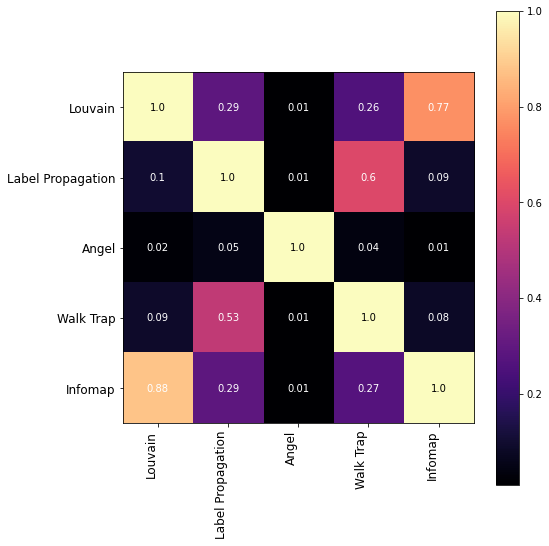

In [11]:
viz_heatmap(LO_coms,LP_coms,AN_coms,WP_coms,IM_coms)

### > Comunities Evaluations goodness

In [12]:
final_communities_evaluation(LO_G, LO_coms, 'Louvain')
final_communities_evaluation(LP_G, LP_coms, 'Label Propagation')
final_communities_evaluation(AN_G, AN_coms, 'Angel')
final_communities_evaluation(DE_G, DE_coms, 'Demon')
final_communities_evaluation(WP_G, WP_coms, 'Walk Trap')
final_communities_evaluation(IM_G, IM_coms, 'Infomap')

Louvain
Average Internal Degree (AID): 	 1.577
Internal Density (ID): 	 0.792
Girvan-Newman Modularity (GNM): 	 0.61
Conductance (C): 	 0.032 

Label Propagation
Average Internal Degree (AID): 	 1.703
Internal Density (ID): 	 0.746
Girvan-Newman Modularity (GNM): 	 0.558
Conductance (C): 	 0.271 

Angel
Average Internal Degree (AID): 	 3.153
Internal Density (ID): 	 0.632
Girvan-Newman Modularity (GNM): 	 -0.193
Conductance (C): 	 0.323 

Demon
Average Internal Degree (AID): 	 3.135
Internal Density (ID): 	 0.583
Girvan-Newman Modularity (GNM): 	 0.135
Conductance (C): 	 0.291 

Walk Trap
Average Internal Degree (AID): 	 1.603
Internal Density (ID): 	 0.68
Girvan-Newman Modularity (GNM): 	 0.531
Conductance (C): 	 0.305 

Infomap
Average Internal Degree (AID): 	 1.405
Internal Density (ID): 	 0.837
Girvan-Newman Modularity (GNM): 	 0.462
Conductance (C): 	 0.013 



## Visualizzazioni delle evoluzioni temporali
### > Evoluzione delle comunità nel tempo

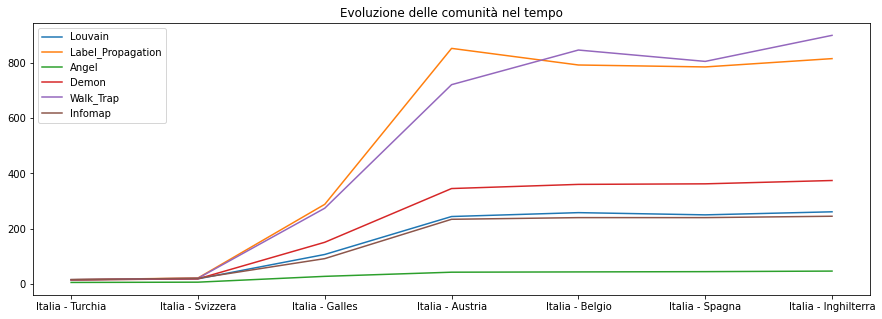

In [13]:
xAxes = ["Italia - Turchia", "Italia - Svizzera", "Italia - Galles", "Italia - Austria", "Italia - Belgio", "Italia - Spagna", "Italia - Inghilterra" ]
title = 'Evoluzione delle comunità nel tempo'
data = {
    "Louvain": LO_time_coms,
    "Label_Propagation":LP_time_coms,
    "Angel": AN_time_coms,
    "Demon": DE_time_coms,
    "Walk_Trap": WP_time_coms,
    "Infomap": IM_time_coms
}
viz_linegraph(data, title, xAxes)

### > Tendenza delle comunità a restare le stesse nel tempo

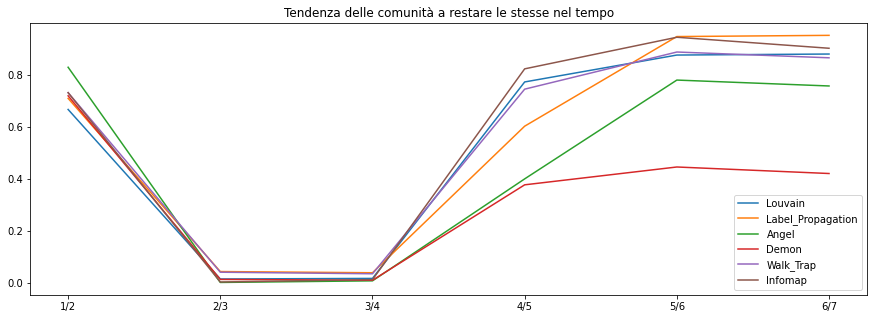

In [14]:
xAxes = ["1/2", "2/3", "3/4", "4/5", "5/6", "6/7"]
title = 'Tendenza delle comunità a restare le stesse nel tempo'
data = {
    "Louvain": LO_tc.clustering_stability_trend(evaluation.nf1),
    "Label_Propagation":LP_tc.clustering_stability_trend(evaluation.nf1),
    "Angel": AN_tc.clustering_stability_trend(evaluation.nf1),
    "Demon": DE_tc.clustering_stability_trend(evaluation.nf1),
    "Walk_Trap": WP_tc.clustering_stability_trend(evaluation.nf1),
    "Infomap": IM_tc.clustering_stability_trend(evaluation.nf1)
}
viz_linegraph(data, title, xAxes)

### > Numero medio dei nodi delle comunità nel tempo

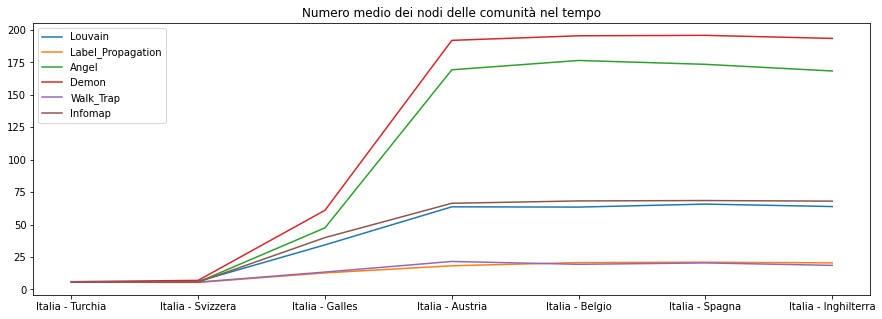

In [15]:
xAxes = ["Italia - Turchia", "Italia - Svizzera", "Italia - Galles", "Italia - Austria", "Italia - Belgio", "Italia - Spagna", "Italia - Inghilterra" ]
title = 'Numero medio dei nodi delle comunità nel tempo'
data = {
    "Louvain": LO_coms_nodes,
    "Label_Propagation":LP_coms_nodes,
    "Angel": AN_coms_nodes,
    "Demon": DE_coms_nodes,
    "Walk_Trap": WP_coms_nodes,
    "Infomap": IM_coms_nodes
}
viz_linegraph(data, title, xAxes)

## Crescita della rete nel tempo

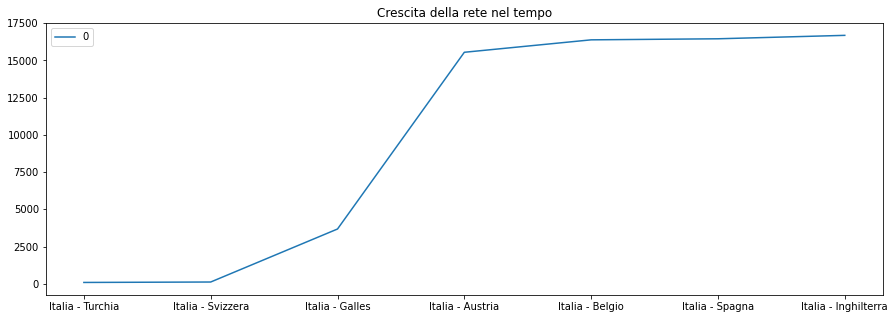

In [16]:
xAxes = ["Italia - Turchia", "Italia - Svizzera", "Italia - Galles", "Italia - Austria", "Italia - Belgio", "Italia - Spagna", "Italia - Inghilterra" ]
title = "Crescita della rete nel tempo"
viz_linegraph(net_growth, title, xAxes)

In [17]:
gridline = []
for i in range(5):
    gridline.append("")
grid = []
for i in range(5):
    grid.append(list(gridline))
    
gridline

['', '', '', '', '']